In [132]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from data_load import image_data_loader

In [133]:
X, y = image_data_loader()

In [134]:
len(X)

9279

In [135]:
import matplotlib.pyplot as plt
import seaborn as sns

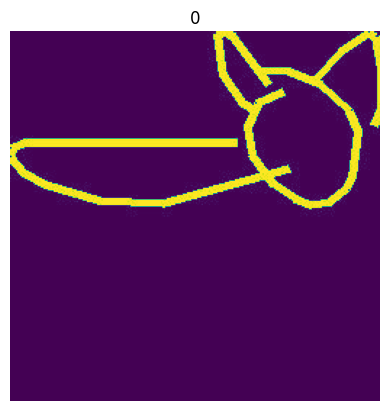

In [136]:
plt.axis('off')
plt.title(y[0])
plt.imshow(X[0])

In [137]:
from sklearn.utils import shuffle

In [138]:
X, y = shuffle(X, y)

In [139]:
def split_to_train_test(data, train_ratio=0.8, test_ratio=0.1):
    SIZE = len(data)
    train = data[:int(SIZE * train_ratio)]
    rest = data[int(SIZE * train_ratio):]
    test = rest[:int(SIZE * test_ratio)]
    val = rest[int(SIZE * test_ratio):]

    print(len(train), len(test), len(val))

    return train, test, val

In [140]:
train_X, test_X, val_X = split_to_train_test(X)

7423 927 929


In [141]:
train_y, test_y, val_y = split_to_train_test(y)


7423 927 929


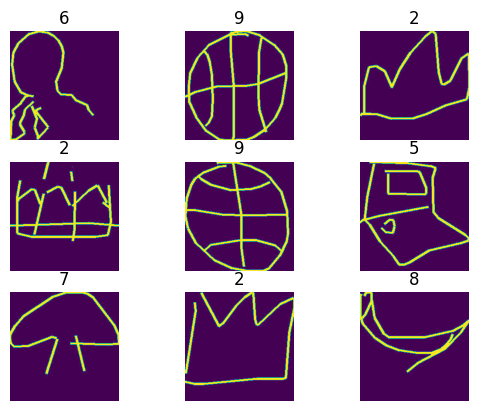

In [142]:
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.axis('off')
    plt.title(int(train_y[i]))
    plt.imshow(train_X[i]);

In [143]:
import pandas as pd

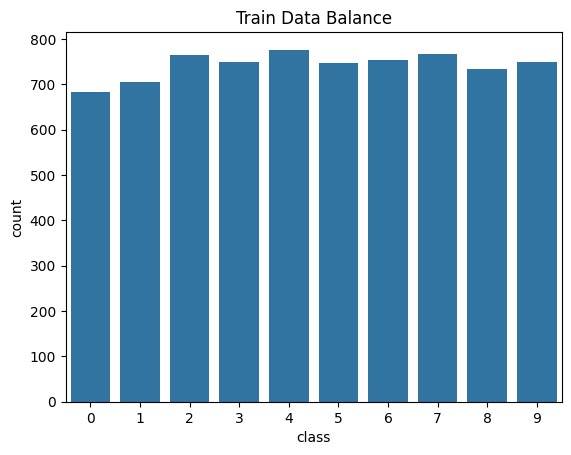

In [144]:
plt.title('Train Data Balance')
classes_df = pd.DataFrame({'class': train_y})
sns.countplot(data=classes_df, x='class');

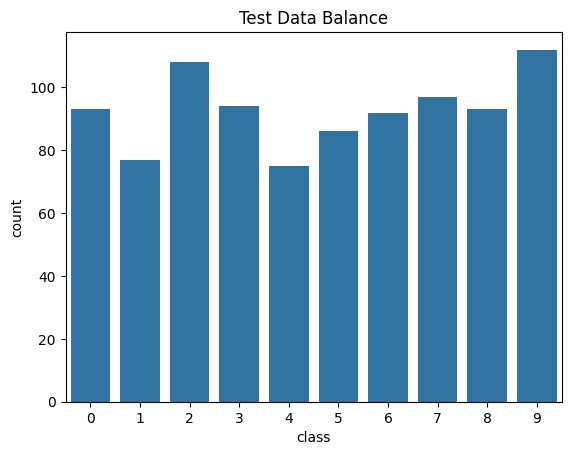

In [145]:
plt.title('Test Data Balance')
classes_df = pd.DataFrame({'class': test_y})
sns.countplot(data=classes_df, x='class');

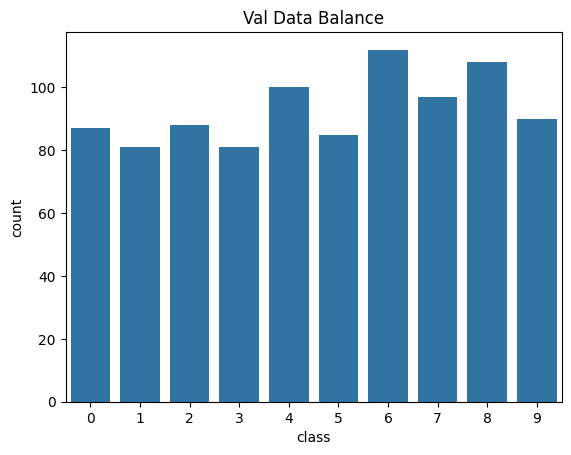

In [146]:
plt.title('Val Data Balance')
classes_df = pd.DataFrame({'class': val_y})
sns.countplot(data=classes_df, x='class');

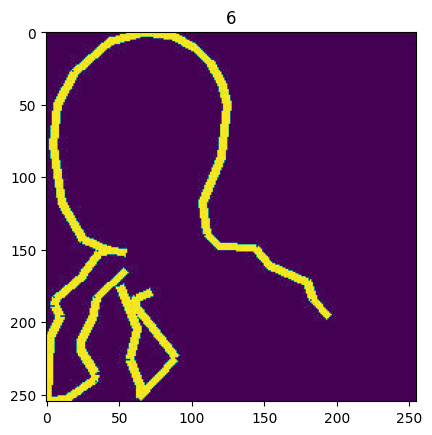

In [147]:
plt.title(train_y[0])
plt.imshow(train_X[0])

# **MODEL**

In [148]:
"""
If your Y
is are one-hot encoded, use categorical_crossentropy.
Examples (for a 3-class classification): [1,0,0] , [0,1,0], [0,0,1]

But if your Y
is are integers, use sparse_categorical_crossentropy.
Examples for above 3-class classification problem: [1] , [2], [3]
"""

'\nIf your Y\nis are one-hot encoded, use categorical_crossentropy.\nExamples (for a 3-class classification): [1,0,0] , [0,1,0], [0,0,1]\n\nBut if your Y\nis are integers, use sparse_categorical_crossentropy.\nExamples for above 3-class classification problem: [1] , [2], [3]\n'

In [149]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.losses import SparseCategoricalCrossentropy

In [150]:
train_X = np.expand_dims(train_X, axis=3)
test_X = np.expand_dims(test_X, axis=3)
val_X = np.expand_dims(val_X, axis=3)
train_X.shape

(7423, 255, 255, 1)

In [151]:
input_shape = train_X.shape[1:]
input_shape

(255, 255, 1)

In [152]:
from data_loader import categories

In [153]:
num_classes = len(categories)
num_classes

10

In [154]:
model = Sequential([
    layers.Rescaling(1./255, input_shape=input_shape),
    layers.Conv2D(2, (3, 3), activation='relu'),
    layers.MaxPool2D(pool_size=(2, 2)),
    layers.BatchNormalization(),
    layers.Conv2D(2, (3, 3), activation='relu'),
    layers.MaxPool2D(pool_size=(2, 2)),
    layers.BatchNormalization(),

    layers.Flatten(),

    layers.Dense(512, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(num_classes, activation='softmax')
])

In [155]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_8 (Rescaling)     (None, 255, 255, 1)       0         
                                                                 
 conv2d_15 (Conv2D)          (None, 253, 253, 2)       20        
                                                                 
 max_pooling2d_14 (MaxPooli  (None, 126, 126, 2)       0         
 ng2D)                                                           
                                                                 
 batch_normalization_14 (Ba  (None, 126, 126, 2)       8         
 tchNormalization)                                               
                                                                 
 conv2d_16 (Conv2D)          (None, 124, 124, 2)       38        
                                                                 
 max_pooling2d_15 (MaxPooli  (None, 62, 62, 2)        

In [158]:
model.compile(
    optimizer=Adam(),
    loss=SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

In [169]:
history = model.fit(
    train_X, train_y,
    validation_data=(val_X, val_y),
    epochs=10,
    verbose=2,
    shuffle=True
)

Epoch 1/10
232/232 - 14s - loss: 1.6031 - accuracy: 0.3466 - val_loss: 1.5661 - val_accuracy: 0.3767 - 14s/epoch - 59ms/step
Epoch 2/10
232/232 - 14s - loss: 1.5533 - accuracy: 0.3649 - val_loss: 1.4881 - val_accuracy: 0.4166 - 14s/epoch - 58ms/step
Epoch 3/10
232/232 - 14s - loss: 1.5271 - accuracy: 0.3792 - val_loss: 1.4683 - val_accuracy: 0.4112 - 14s/epoch - 60ms/step
Epoch 4/10
232/232 - 14s - loss: 1.5012 - accuracy: 0.3940 - val_loss: 1.4161 - val_accuracy: 0.4672 - 14s/epoch - 61ms/step
Epoch 5/10
232/232 - 14s - loss: 1.4458 - accuracy: 0.4245 - val_loss: 1.3736 - val_accuracy: 0.4607 - 14s/epoch - 61ms/step
Epoch 6/10
232/232 - 14s - loss: 1.4257 - accuracy: 0.4315 - val_loss: 1.4016 - val_accuracy: 0.4543 - 14s/epoch - 61ms/step
Epoch 7/10
232/232 - 14s - loss: 1.3754 - accuracy: 0.4520 - val_loss: 1.4797 - val_accuracy: 0.4693 - 14s/epoch - 61ms/step
Epoch 8/10
232/232 - 14s - loss: 1.3407 - accuracy: 0.4664 - val_loss: 1.3507 - val_accuracy: 0.5285 - 14s/epoch - 61ms/step


In [170]:
model.evaluate(test_X, test_y)

29/29 [==============================] - 0s 9ms/step - loss: 1.4375 - accuracy: 0.5502


[1.4374873638153076, 0.5501618385314941]

In [171]:
pred = model.predict(test_X)

29/29 [==============================] - 0s 9ms/step


In [174]:
np.argmax(pred[0])

9

In [175]:
test_y[0]

9

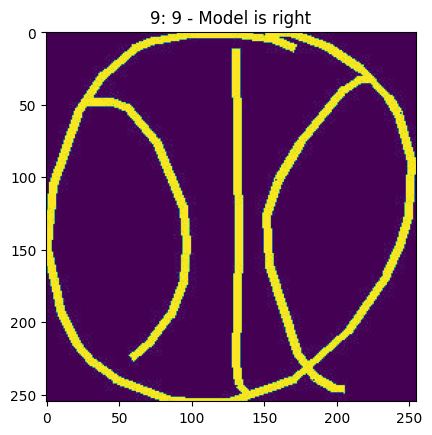

In [178]:
plt.title(f'{np.argmax(pred[0])}: {test_y[0]} - Model is {"right" if np.argmax(pred[0]) == test_y[0] else "wrong"}')
plt.imshow(test_X[0])

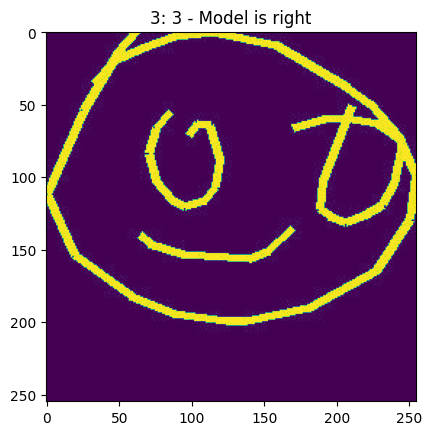

In [179]:
plt.title(f'{np.argmax(pred[1])}: {test_y[1]} - Model is {"right" if np.argmax(pred[1]) == test_y[1] else "wrong"}')
plt.imshow(test_X[1])